In [2]:
import pandas as pd
import numpy as np

In [3]:
qvi = pd.read_csv(r'QVI_data.csv')
qvi

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [4]:
# find revenue per store

# first, we will compress the table and use only the columns we need


revPerStore = qvi[['STORE_NBR', 'TOT_SALES']]
revPerStore

,STORE_NBR,TOT_SALES
0,1,6.0
1,1,2.7
2,1,3.6
3,1,3.0
4,1,1.9
...,...,...
264829,88,7.2
264830,88,9.2
264831,88,8.4
264832,88,10.2


In [5]:
#   next we will group sales by  a store 
revPerStore = revPerStore.groupby('STORE_NBR').sum()

In [6]:
revPerStore

,TOT_SALES
STORE_NBR,
1,2393.60
2,2005.80
3,12802.45
4,14647.65
5,9500.80
...,...
268,2601.05
269,11221.80
270,11293.95


In [7]:
# next we will determine the store with most number of customers
storeWithMostCustomers = qvi[['STORE_NBR', 'LYLTY_CARD_NBR']]
storeWithMostCustomers = storeWithMostCustomers.groupby('STORE_NBR').count()
storeWithMostCustomers 

,LYLTY_CARD_NBR
STORE_NBR,
1,573
2,506
3,1502
4,1678
5,1361
...,...
268,546
269,1607
270,1630


In [8]:
# we will now also check how much a customer spent 
customerTransaction= qvi[[ 'LYLTY_CARD_NBR','TOT_SALES',]]
customerTransaction = customerTransaction.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum().reset_index()
customerTransaction

,LYLTY_CARD_NBR,TOT_SALES
0,1000,6.0
1,1002,2.7
2,1003,6.6
3,1004,1.9
4,1005,2.8
...,...,...
72631,2370651,13.0
72632,2370701,7.2
72633,2370751,9.2
72634,2370961,18.6


In [9]:
# next, we will find the average number of transactions per customer
averageTransaction = qvi[['TXN_ID','STORE_NBR']]
averageTransaction = averageTransaction.groupby('STORE_NBR').count().reset_index()

averageTransaction

,STORE_NBR,TXN_ID
0,1,573
1,2,506
2,3,1502
3,4,1678
4,5,1361
...,...,...
267,268,546
268,269,1607
269,270,1630
270,271,1385


In [10]:
# next, we will find which type of customer is popular at which store
customerType = qvi[['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER','LYLTY_CARD_NBR']]
customerType = customerType.groupby(['STORE_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customerType.rename(columns={'LYLTY_CARD_NBR': 'UNIQUE_CUSTOMER_COUNT'}, inplace=True)
customerType



,STORE_NBR,LIFESTAGE,PREMIUM_CUSTOMER,UNIQUE_CUSTOMER_COUNT
0,1,MIDAGE SINGLES/COUPLES,Budget,11
1,1,MIDAGE SINGLES/COUPLES,Mainstream,13
2,1,MIDAGE SINGLES/COUPLES,Premium,12
3,1,NEW FAMILIES,Budget,7
4,1,NEW FAMILIES,Mainstream,6
...,...,...,...,...
5405,272,YOUNG FAMILIES,Mainstream,8
5406,272,YOUNG FAMILIES,Premium,9
5407,272,YOUNG SINGLES/COUPLES,Budget,15
5408,272,YOUNG SINGLES/COUPLES,Mainstream,59


In [11]:
filtered_data1 = customerType[customerType['STORE_NBR'].isin([77, 86, 88])]
filtered_data1

,STORE_NBR,LIFESTAGE,PREMIUM_CUSTOMER,UNIQUE_CUSTOMER_COUNT
1507,77,MIDAGE SINGLES/COUPLES,Budget,6
1508,77,MIDAGE SINGLES/COUPLES,Mainstream,11
1509,77,MIDAGE SINGLES/COUPLES,Premium,11
1510,77,NEW FAMILIES,Budget,7
1511,77,NEW FAMILIES,Mainstream,3
...,...,...,...,...
1734,88,YOUNG FAMILIES,Mainstream,11
1735,88,YOUNG FAMILIES,Premium,15
1736,88,YOUNG SINGLES/COUPLES,Budget,7
1737,88,YOUNG SINGLES/COUPLES,Mainstream,32


In [12]:
filtered_data2 = averageTransaction[averageTransaction['STORE_NBR'].isin([77, 86, 88])]
filtered_data2

,STORE_NBR,TXN_ID
76,77,563
85,86,1538
87,88,1873


In [13]:
filtered_data3 = storeWithMostCustomers[storeWithMostCustomers.index.isin([77, 86, 88])]
filtered_data3

,LYLTY_CARD_NBR
STORE_NBR,
77,563
86,1538
88,1873


In [14]:
filtered_data4 = revPerStore[revPerStore.index.isin([77, 86, 88])]
filtered_data4

,TOT_SALES
STORE_NBR,
77,3040.00
86,10635.35
88,16333.25


In [15]:
# we want to know which best selling product is sold at which store 

bestSellingProduct = qvi[['STORE_NBR', 'PROD_NAME']]
bestSellingProduct = bestSellingProduct.groupby(['STORE_NBR', 'PROD_NAME']).size().reset_index(name='COUNT')
bestSellingProduct = bestSellingProduct.sort_values(by='COUNT', ascending=False)
bestSellingProduct = bestSellingProduct.drop_duplicates(subset='STORE_NBR')
bestSellingProduct






,STORE_NBR,PROD_NAME,COUNT
7342,88,Infzns Crn Crnchers Tangy Gcamole 110g,50
19193,226,Tyrrells Crisps Ched & Chives 165g,49
3331,40,Old El Paso Salsa Dip Tomato Mild 300g,49
17293,203,Kettle Honey Soy Chicken 175g,46
5008,58,Kettle Tortilla ChpsFeta&Garlic 150g,46
...,...,...,...
6467,76,Smiths Thinly Cut Roast Chicken 175g,1
21235,252,Pringles Chicken Salt Crips 134g,1
2558,31,Doritos Mexicana 170g,1
16604,193,Infuzions Thai SweetChili PotatoMix 110g,1


In [16]:
# lets see which store has the most number of customers
storeWithMostCustomers = qvi[['STORE_NBR', 'LYLTY_CARD_NBR']]
storeWithMostCustomers = storeWithMostCustomers.groupby('STORE_NBR').count()
storeWithMostCustomers = storeWithMostCustomers.sort_values(by='LYLTY_CARD_NBR', ascending=False)
storeWithMostCustomers

,LYLTY_CARD_NBR
STORE_NBR,
226,2020
88,1873
93,1832
165,1819
237,1785
...,...
206,2
31,2
252,2


In [17]:
#1 Customer Segmentation: 
# high value customers show preference for which products
# high value customers show preference for which stores
highValueCustomers = qvi[qvi['PREMIUM_CUSTOMER'] == 'Premium']
highValueCustomers = highValueCustomers.groupby(['STORE_NBR', 'PROD_NAME']).size().reset_index(name='COUNT')
highValueCustomers = highValueCustomers.sort_values(by='COUNT', ascending=False)
highValueCustomers = highValueCustomers.drop_duplicates(subset='STORE_NBR')
highValueCustomers







,STORE_NBR,PROD_NAME,COUNT
2874,40,Old El Paso Salsa Dip Tomato Mild 300g,20
5318,72,Infuzions Thai SweetChili PotatoMix 110g,18
514,7,Twisties Chicken270g,17
12174,165,Kettle Sensations Siracha Lime 150g,17
15812,217,Doritos Cheese Supreme 330g,17
...,...,...,...
768,11,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,1
19127,263,Doritos Salsa Medium 300g,1
10791,146,Smiths Thinly Cut Roast Chicken 175g,1
11846,161,Tostitos Lightly Salted 175g,1


In [18]:
# Certain product categories (e.g., ) experience a surge in sales during holiday seasons, while others (e.g., home goods) are more consistent year-round.
# Certain stores experience a surge in sales during holiday seasons, while others are more consistent year-round.
import pandas as pd

# Assuming qvi is your DataFrame
seasonalSales = qvi[['STORE_NBR', 'PROD_NAME', 'DATE']]

# Convert DATE to datetime and extract MONTH
seasonalSales['DATE'] = pd.to_datetime(seasonalSales['DATE'])
seasonalSales['MONTH'] = seasonalSales['DATE'].dt.month

# Group by PROD_NAME and MONTH, then count the occurrences
seasonalSales = seasonalSales.groupby(['PROD_NAME', 'MONTH']).size().reset_index(name='COUNT')

# Sort by COUNT in descending order
seasonalSales = seasonalSales.sort_values(by='COUNT', ascending=False)

# Drop duplicates based on PROD_NAME to keep only the top month for each product
seasonalSales = seasonalSales.drop_duplicates(subset='PROD_NAME')

# Display the result
print(seasonalSales)


                                     PROD_NAME  MONTH  COUNT
706               Pringles Sweet&Spcy BBQ 134g     11    325
1223                      Twisties Chicken270g     12    320
504   Kettle Tortilla ChpsHny&Jlpno Chili 150g      1    318
1226    Tyrrells Crisps     Ched & Chives 165g      3    308
407     Kettle Mozzarella   Basil & Pesto 175g     12    306
...                                        ...    ...    ...
1271         WW Crinkle Cut      Original 175g     12    133
857         Smith Crinkle Cut   Bolognese 150g      6    133
732                   RRD Lime & Pepper   165g      1    132
1348            Woolworths Medium   Salsa 300g      5    132
292      GrnWves Plus Btroot & Chilli Jam 180g      5    127

[114 rows x 3 columns]


C:\Users\Nancy\AppData\Local\Temp\ipykernel_2572\2403285952.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonalSales['DATE'] = pd.to_datetime(seasonalSales['DATE'])
C:\Users\Nancy\AppData\Local\Temp\ipykernel_2572\2403285952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonalSales['MONTH'] = seasonalSales['DATE'].dt.month


In [19]:
import matplotlib.pyplot as plt


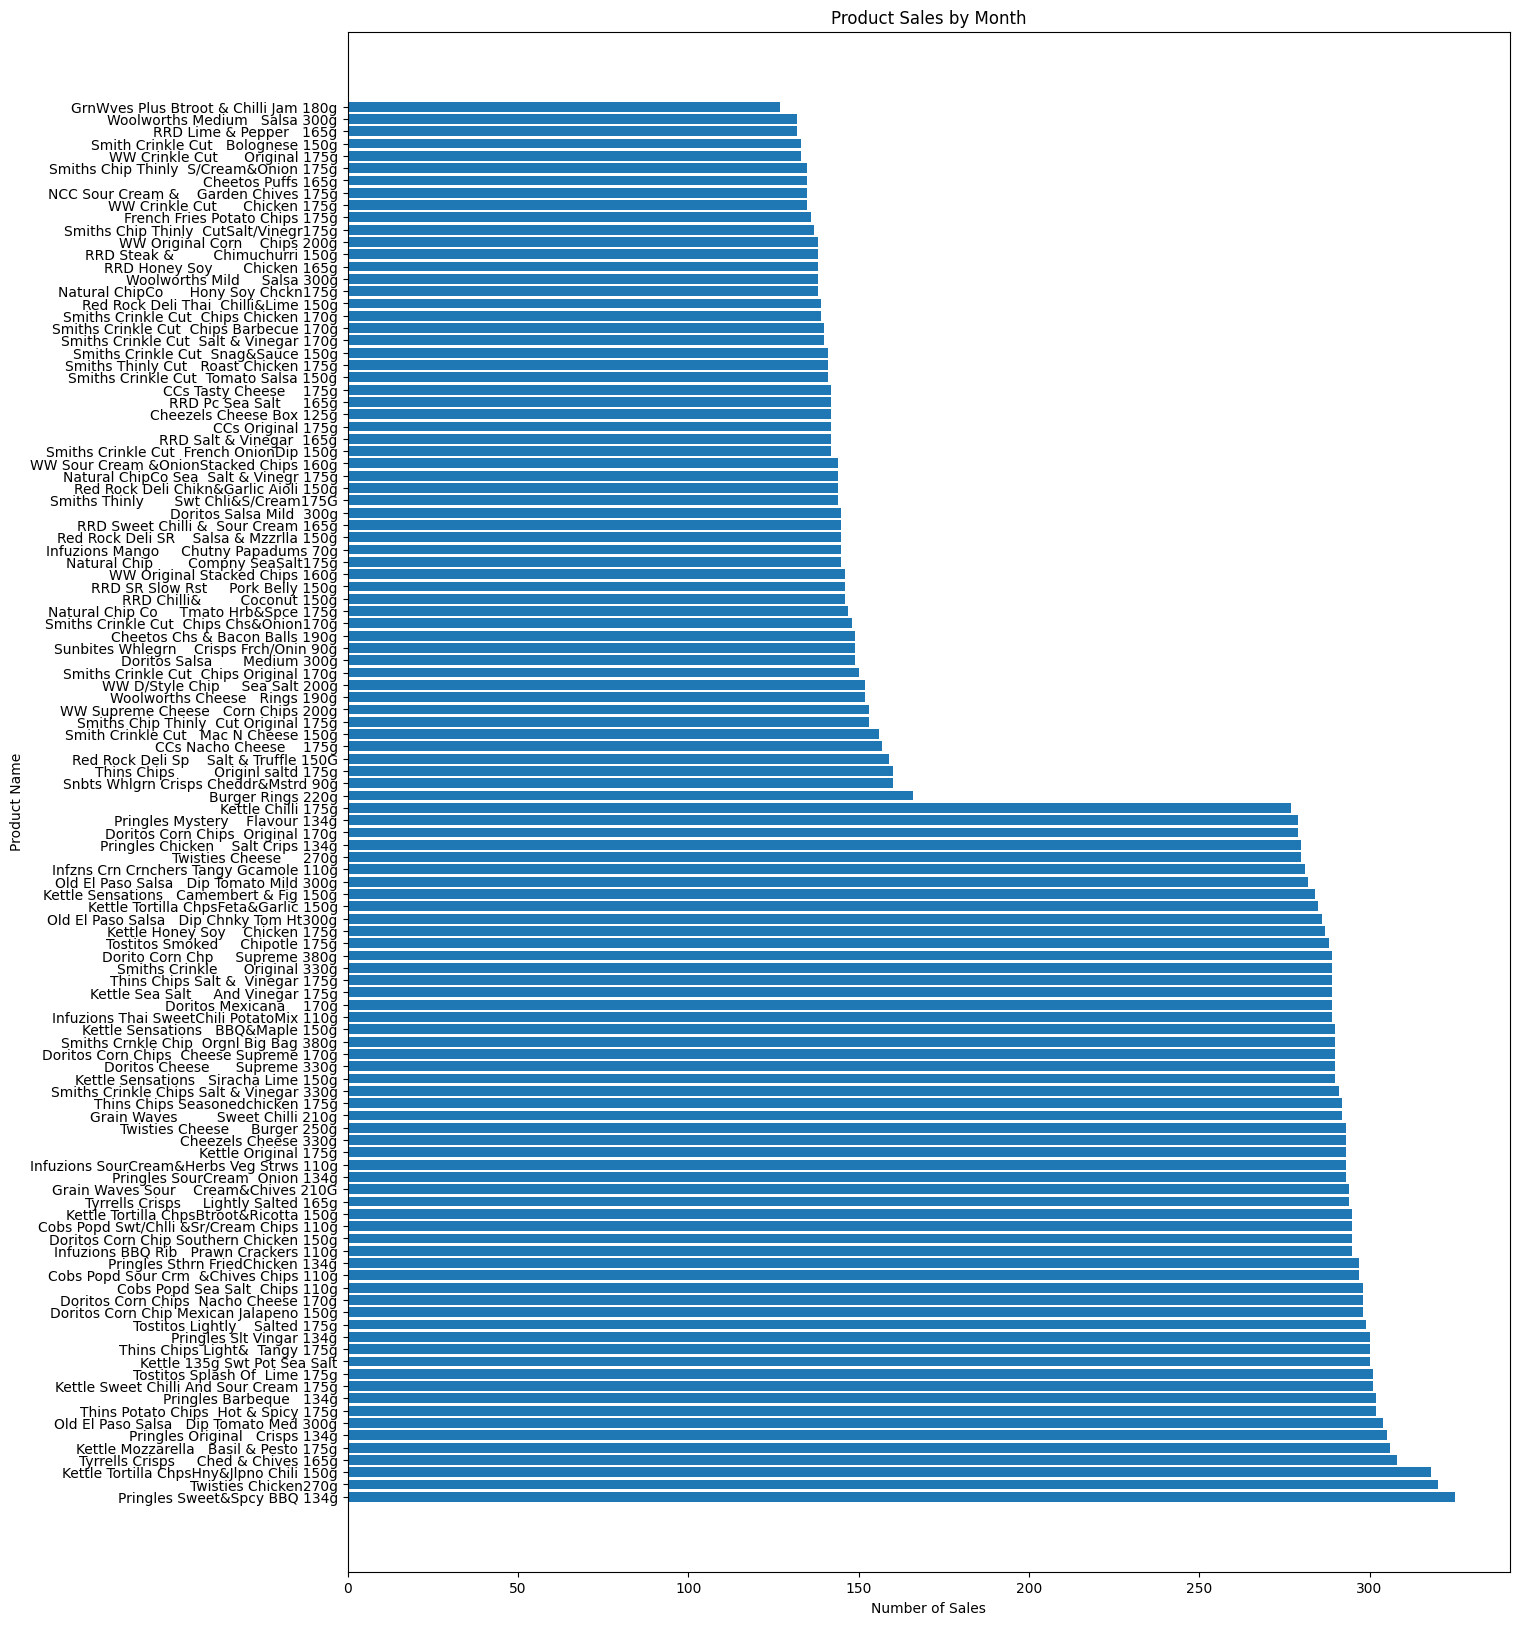

In [20]:


plt.figure(figsize=(15, 20))
plt.barh(seasonalSales['PROD_NAME'], seasonalSales['COUNT'])  # Use barh for horizontal bars
plt.xlabel('Number of Sales')  # Number of sales on the x-axis
plt.ylabel('Product Name')     # Product names on the y-axis
plt.title('Product Sales by Month')
plt.show()


<Figure size 2500x4000 with 0 Axes>

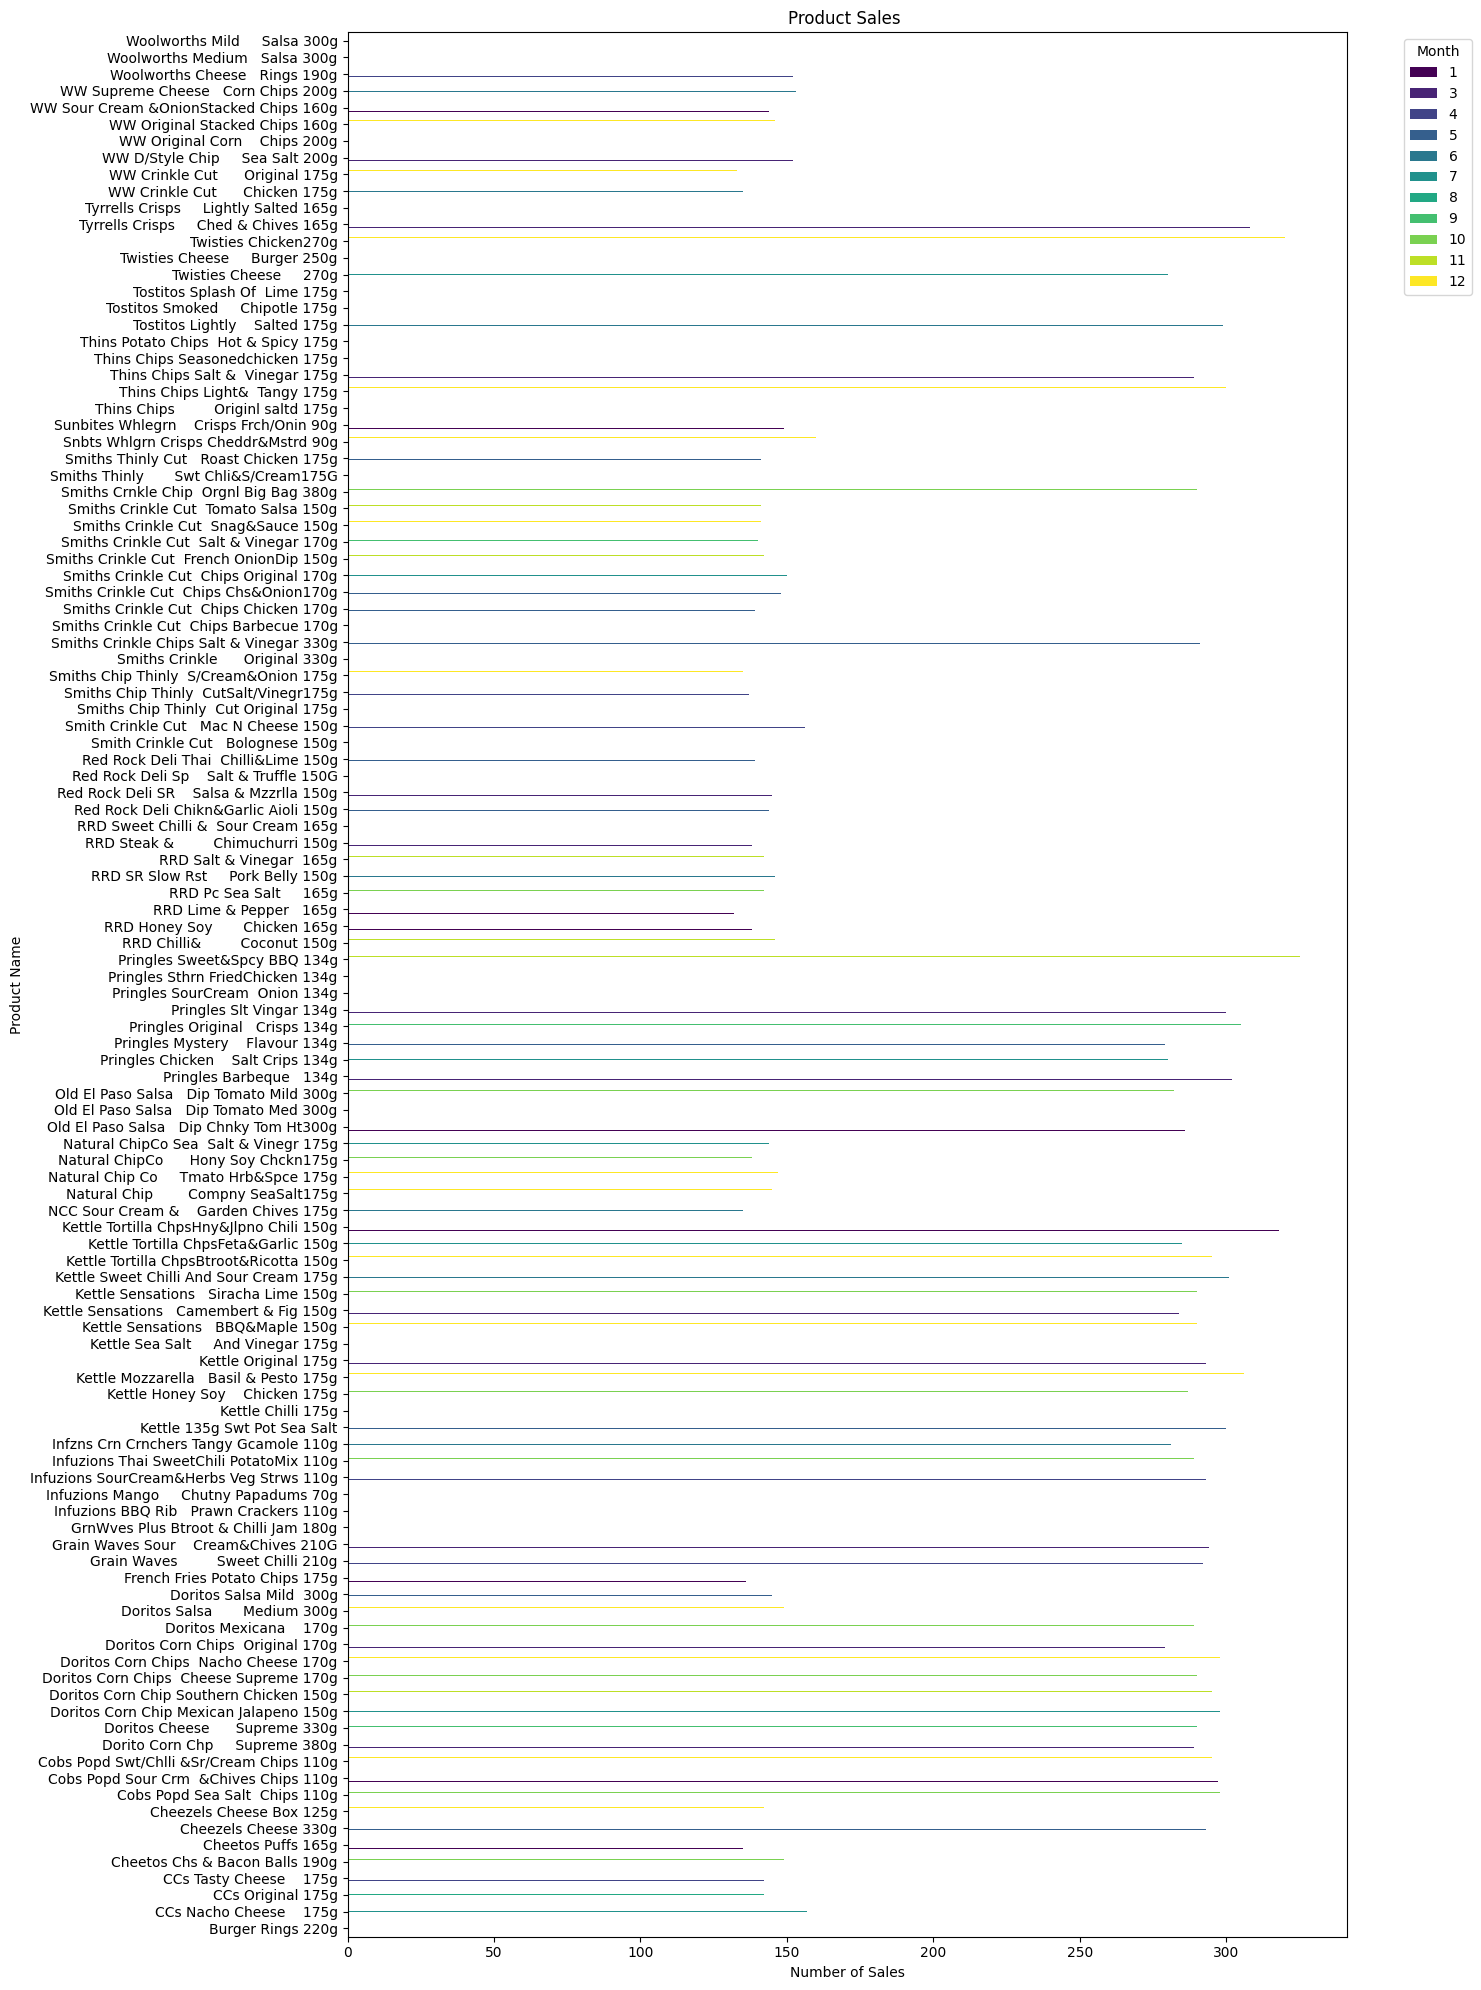

In [21]:
import matplotlib.pyplot as plt

# Pivot the data to have months as columns
pivot_data = seasonalSales.pivot(index='PROD_NAME', columns='MONTH', values='COUNT')

# Plot
plt.figure(figsize=(25, 40))
pivot_data.plot(kind='barh', stacked=False, colormap='viridis', figsize=(15, 20))
plt.xlabel('Number of Sales')
plt.ylabel('Product Name')
plt.title('Product Sales ')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Nancy\AppData\Local\Temp\ipykernel_2572\2851497677.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


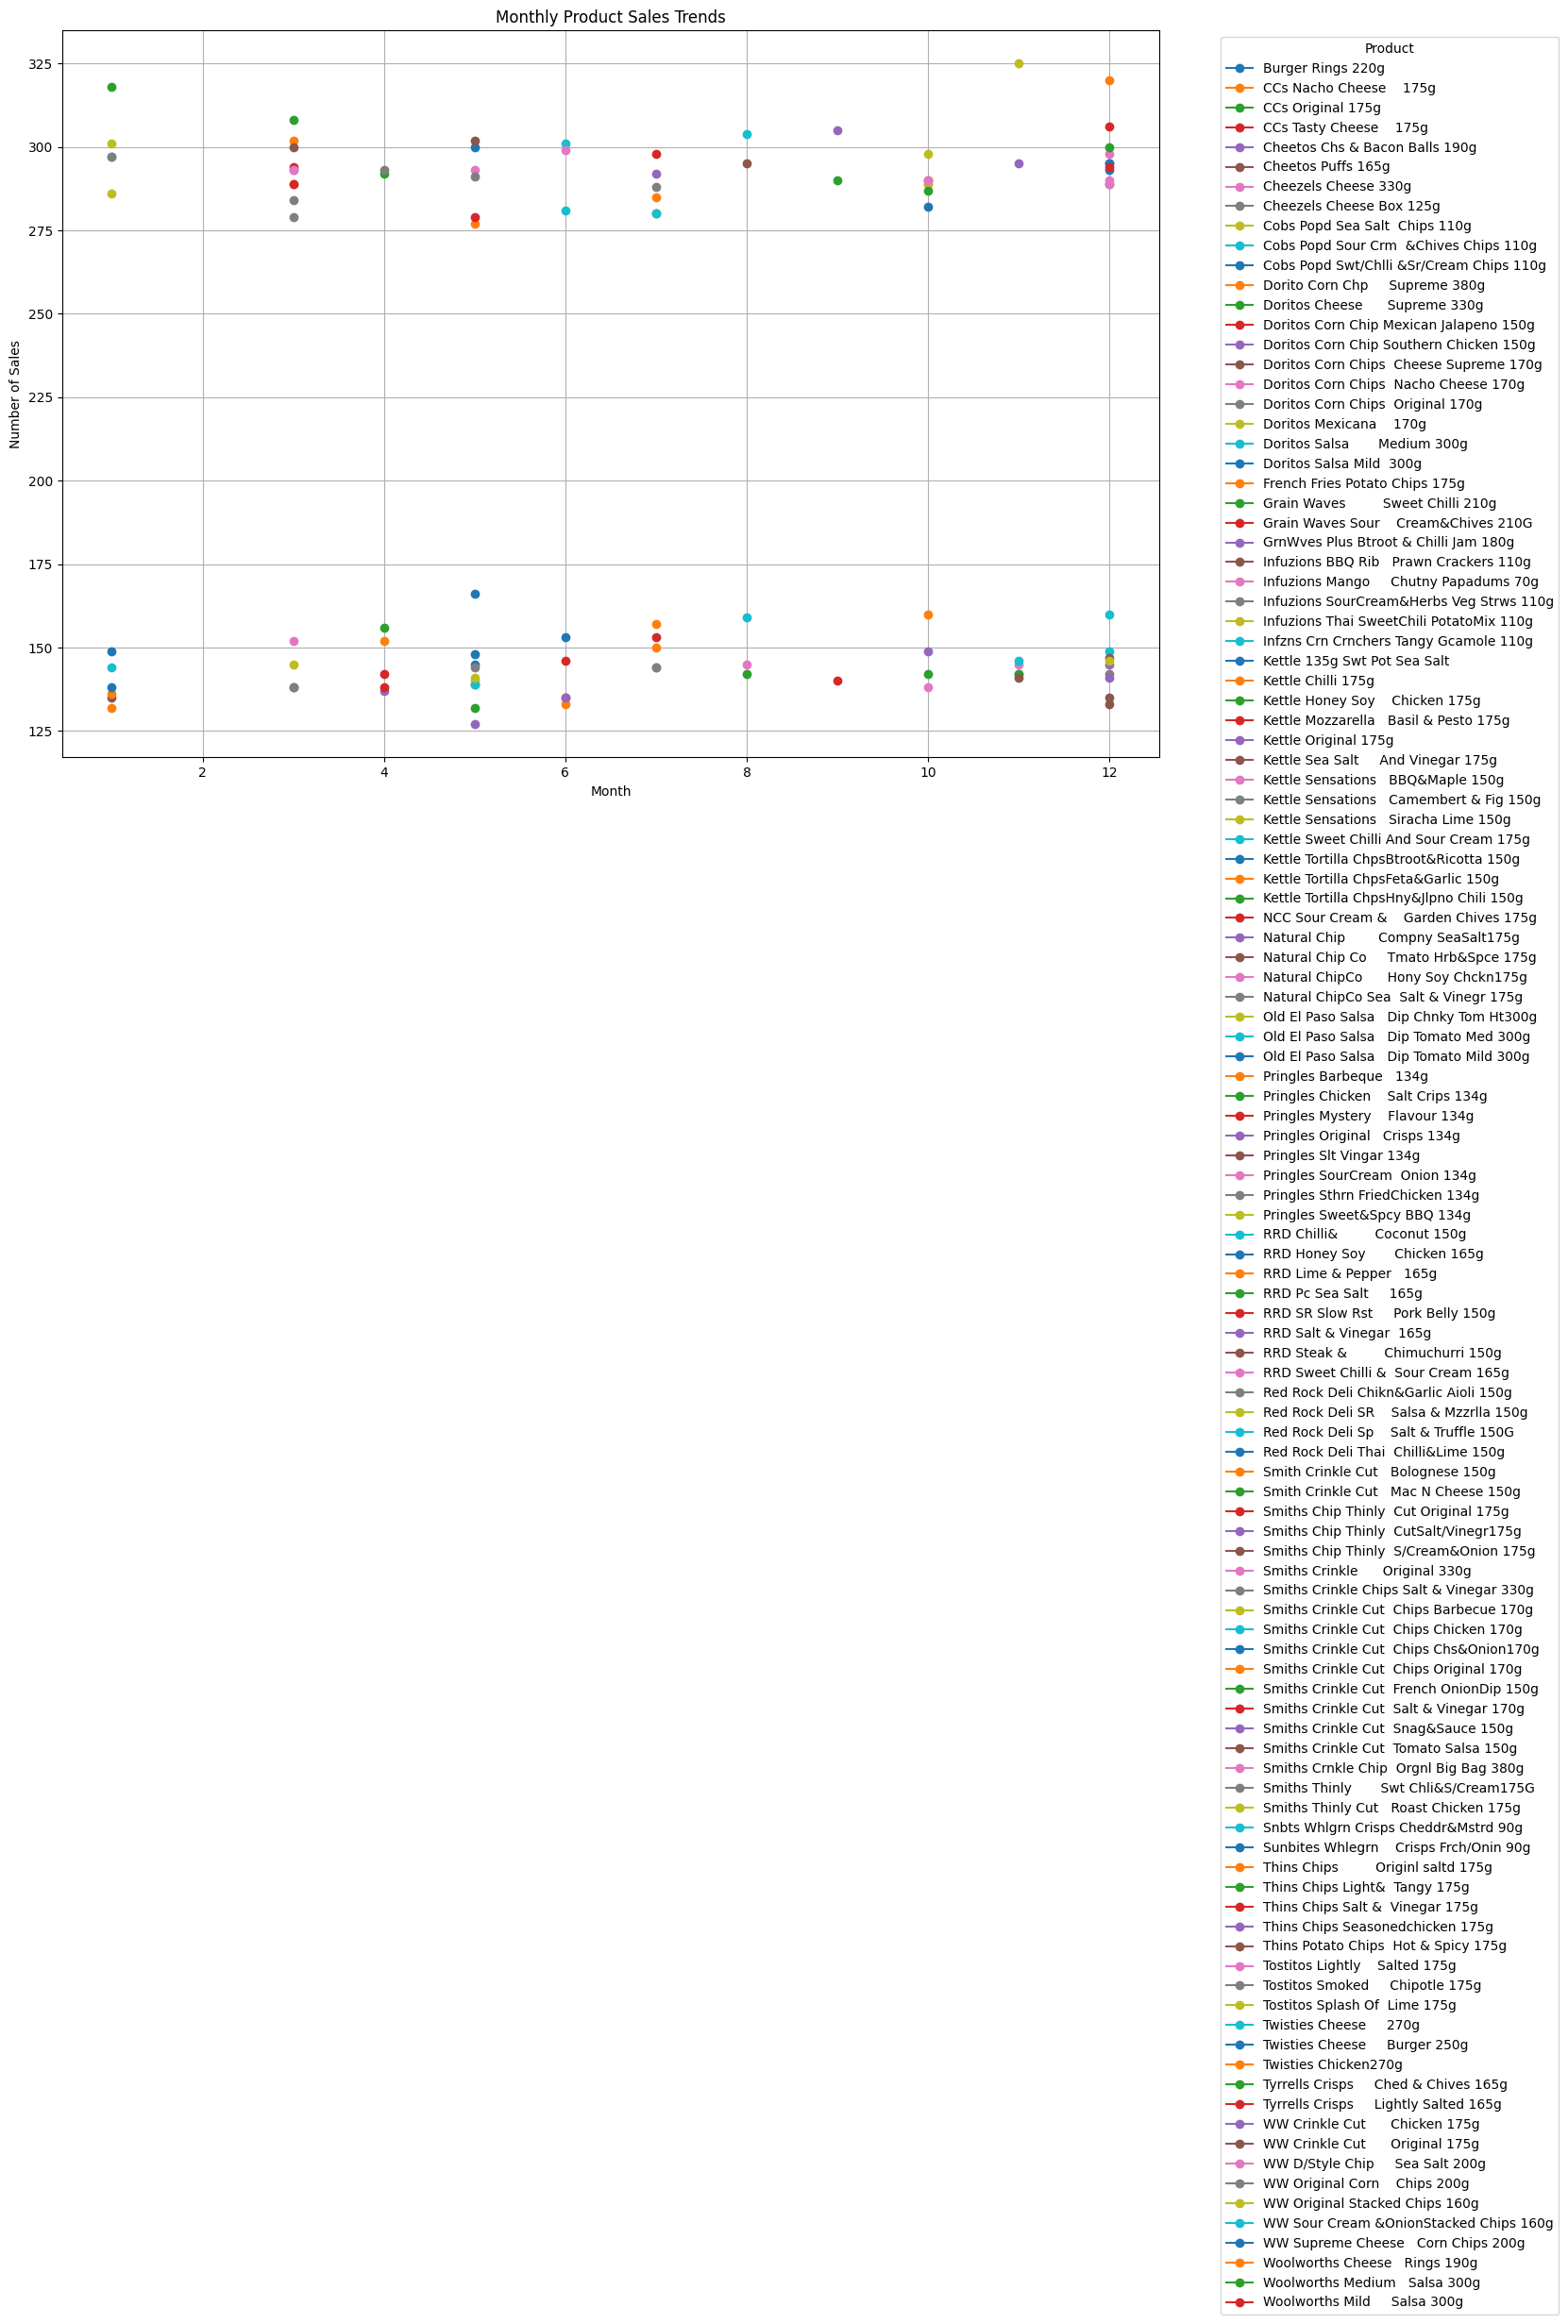

In [ ]:
import matplotlib.pyplot as plt


pivot_data = seasonalSales.pivot(index='PROD_NAME', columns='MONTH', values='COUNT')


plt.figure(figsize=(15, 10))
for product in pivot_data.index:
    plt.plot(pivot_data.columns, pivot_data.loc[product], marker='o', label=product)

plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Monthly Product Sales Trends')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

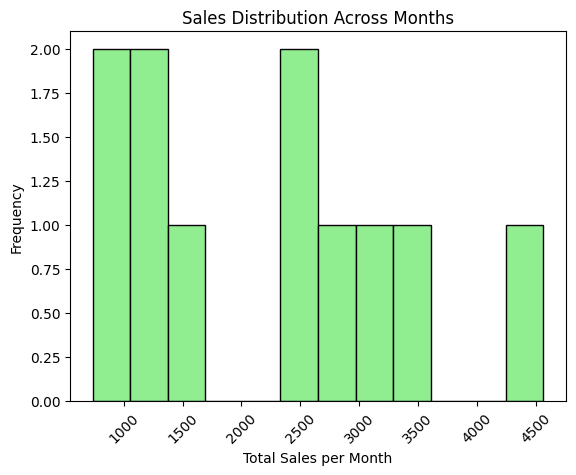

In [ ]:
# histogram
monthly_sales = seasonalSales.groupby('MONTH')['COUNT'].sum()
plt.hist(monthly_sales, bins=12, color='lightgreen', edgecolor='black')
plt.title('Sales Distribution Across Months')
plt.xlabel('Total Sales per Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

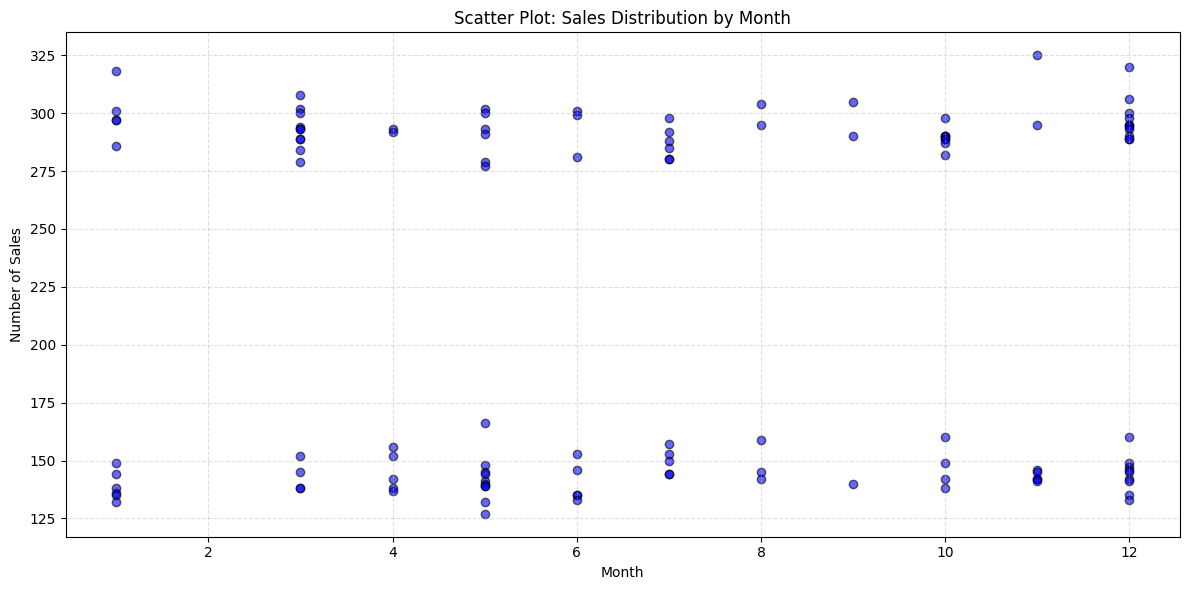

In [ ]:
# scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(
    x=seasonalSales['MONTH'],  
    y=seasonalSales['COUNT'],  
    c='blue',                
    alpha=0.6,                
    edgecolor='black'         
)

plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.title('Scatter Plot: Sales Distribution by Month')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()